In [1]:
import pandas as pd
data=pd.read_csv('Table1.csv')

data['age']=2019-data['year']+1


data['citation_per_year']=data['citation']/data['age']

data.head()

,Unnamed: 0,year,tool,citation,index,global,local,technology,read.length,age,citation_per_year
0,1,2012,Batmis,29.0,BWT-ST,seed,hamming distance,DNA,No,8,3.625000
1,2,2009,BFAST,596.0,hashing,seed,Not specified,DNA,No,11,54.181818
2,3,2011,Bismark,1332.0,BWT-FM,Backward Search,backtracking,Bisulfite,No,9,148.000000
3,4,2012,BLASR,504.0,BWT-FM,chain of seeds,DP,DNA,Yes,8,63.000000
4,5,2016,NanoBLASTer:,5.0,hashing,chain of seeds,DP,DNA,Yes,4,1.250000


In [2]:
class my_colors: 
    red = (0.8,0.,0.13)
    orange = (0.96,0.65,0.51)
    green = (0.02,0.44,0.69)
    blue = (0.57,0.77,1.0)

# Technology 

In [3]:
n=data.shape[0]
n_DNA=data[data.technology == 'DNA'].shape[0]
n_RNA=data[data.technology == 'RNA-Seq'].shape[0]
n_Bisulfite=data[data.technology == 'Bisulfite'].shape[0]
n_other=n-n_DNA-n_RNA-n_Bisulfite

In [4]:
import matplotlib as mpl
import pylab as pl

mpl.rcParams['font.size'] = 14
labels = 'DNA-Seq', 'RNA-Seq', 'BS-Seq', 'Other'
sizes = [n_DNA, n_RNA, n_Bisulfite, n_other]
values = [my_colors.red, my_colors.orange, my_colors.blue, 'grey']
fig1, ax1 = pl.subplots()

ax1.set_title("Technology supported", fontsize=20)
patches, texts, autotexts= ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = values)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
texts[0].set_fontsize(18)
texts[1].set_fontsize(18)
texts[2].set_fontsize(18)
texts[3].set_fontsize(18)
pl.savefig('Figure_1_panels/Domain_pie.pdf')

In [5]:
n=data.shape[0]
n_DNA=data[data.technology == 'DNA'].shape[0]
n_RNA=data[data.technology == 'RNA-Seq'].shape[0]
n_Bisulfite=data[data.technology == 'Bisulfite'].shape[0]
n_other=n-n_DNA-n_RNA-n_Bisulfite

# Index

In [6]:
n=data.shape[0]

n_hashing=data.loc[data['index'] == 'hashing'].shape[0]
n_FM=data.loc[data['index'] == 'BWT-FM'].shape[0]
n_suffix=data.loc[data['index'] == 'suffix array'].shape[0]

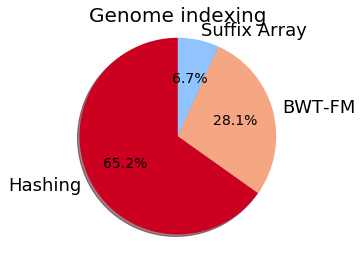

In [7]:
import matplotlib as mpl
import pylab as pl

mpl.rcParams['font.size'] = 14
labels = 'Hashing', 'BWT-FM', 'Suffix Array'
sizes = [n_hashing, n_FM, n_suffix]
values = [my_colors.red, my_colors.orange, my_colors.blue, 'grey']
fig1, ax1 = pl.subplots()

ax1.set_title("Genome indexing", fontsize=20)
patches, texts, autotexts= ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = values)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
texts[0].set_fontsize(18)
texts[1].set_fontsize(18)
texts[2].set_fontsize(18)
pl.savefig('Figure_1_panels/Index_pie.pdf')

# Global

In [8]:
n=data.shape[0]

n_seed=data.loc[data['global'] == 'seed'].shape[0]
n_BS=data.loc[data['global'] == 'Backward Search'].shape[0]
n_chain=data.loc[data['global'] == 'chain of seeds'].shape[0]

print n_seed,n_BS,n_chain

61 18 10


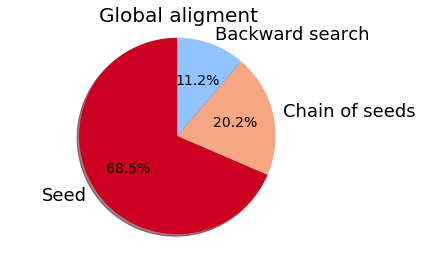

In [9]:
import matplotlib as mpl
import pylab as pl

mpl.rcParams['font.size'] = 14
labels = 'Seed', 'Chain of seeds', 'Backward search'
sizes = [n_seed, n_BS, n_chain]
values = [my_colors.red, my_colors.orange, my_colors.blue, 'grey']
fig1, ax1 = pl.subplots()

ax1.set_title("Global aligment", fontsize=20)
patches, texts, autotexts= ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = values)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
texts[0].set_fontsize(18)
texts[1].set_fontsize(18)
texts[2].set_fontsize(18)
pl.savefig('Figure_1_panels/Global_pie.pdf')

# Local

In [10]:
n=data.shape[0]

n_DP=data.loc[data['local'] == 'DP'].shape[0]
n_NW=data.loc[data['local'] == 'Needleman–Wunsch'].shape[0]
n_SW=data.loc[data['local'] == 'Smith-Waterman'].shape[0]
n_BT=data.loc[data['local'] == 'backtracking'].shape[0]
n_HD=data.loc[data['local'] == 'hamming distance'].shape[0]

n_other=n-n_DP-n_NW-n_SW-n_BT-n_HD

print n_DP,n_NW,n_SW,n_BT,n_HD,n_other

17 0 16 7 12 40


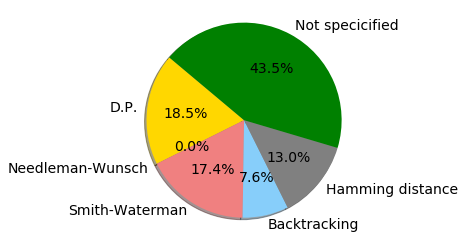

In [11]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'D.P.', 'Needleman-Wunsch', 'Smith-Waterman', 'Backtracking','Hamming distance','Not specicified'
sizes = [n_DP, n_NW, n_SW, n_BT,n_HD,n_other]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','grey','green']
explode = (0, 0, 0, 0,0,0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.savefig('Figure_1_panels/Local_pie.pdf')

# Number of citations -- index

KruskalResult(statistic=13.487684729064028, pvalue=0.0002401343100468314)
KruskalResult(statistic=7.022499999999994, pvalue=0.008049177085516664)
KruskalResult(statistic=0.9358090185676531, pvalue=0.3333579905725579)


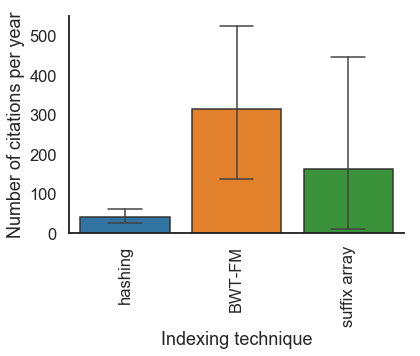

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

data_clean=data.loc[data['index'] != 'BWT-ST']
data_clean=data_clean.loc[data_clean['index'] != 'suffix tree']



g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.barplot(x="index", y="citation_per_year", data=data_clean,edgecolor=(0.2,0.2,0.2), capsize=0.3,  errwidth=1.5)

#g=sns.boxplot(x="index", y="citation_per_year", data=data)
#g=sns.swarmplot(x="index", y="citation_per_year", data=data)

g.set(xlabel='Indexing technique', ylabel='Number of citations per year')
g=sns.despine()
plt.xticks(rotation=90)
pl.savefig('Figure_1_panels/Citation.per.index.pdf', bbox_inches='tight')




p_value1 = stats.kruskal(data[(data['index']=='hashing')].index.tolist(),
                         data[(data['index']=='BWT-FM')].index.tolist())

p_value2 = stats.kruskal(data[(data['index']=='suffix array')].index.tolist(),
                         data[(data['index']=='BWT-FM')].index.tolist())

p_value3 = stats.kruskal(data[(data['index']=='suffix array')].index.tolist(),
                         data[(data['index']=='hashing')].index.tolist())

print p_value1
print p_value2
print p_value3

# Number of citations -- local

KruskalResult(statistic=22.629644808743137, pvalue=1.964302465428671e-06)
KruskalResult(statistic=0.45057471264367166, pvalue=0.502062158789853)


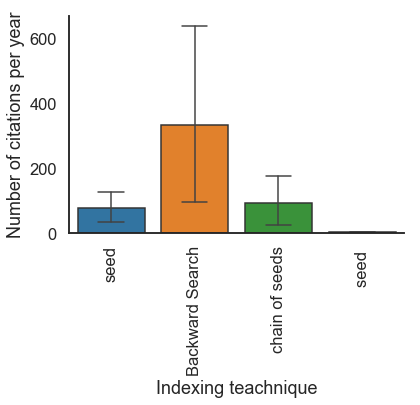

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats




g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.barplot(x="global", y="citation_per_year", data=data_clean,edgecolor=(0.2,0.2,0.2), capsize=0.3,  errwidth=1.5)

#g=sns.boxplot(x="index", y="citation_per_year", data=data)
#g=sns.swarmplot(x="index", y="citation_per_year", data=data)

g.set(xlabel='Indexing teachnique', ylabel='Number of citations per year')
g=sns.despine()
plt.xticks(rotation=90)
pl.savefig('Figure_1_panels/Citation.per.global.pdf', bbox_inches='tight')




p_value1 = stats.kruskal(data[(data['global']=='Backward Search')].index.tolist(),
                         data[(data['global']=='seed')].index.tolist())

p_value2 = stats.kruskal(data[(data['global']=='Backward Search')].index.tolist(),
                         data[(data['global']=='chain of seeds')].index.tolist())



print p_value1
print p_value2


KruskalResult(statistic=7.249999999999986, pvalue=0.0070901012238155986)
KruskalResult(statistic=9.44642857142857, pvalue=0.0021156065158529974)


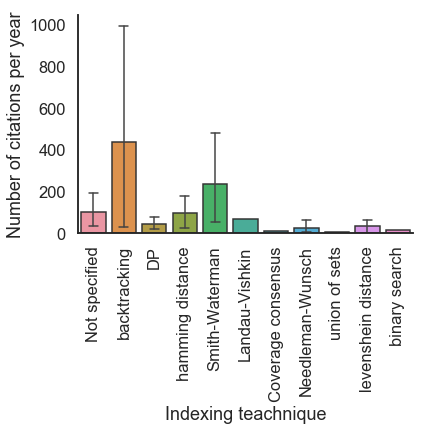

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats





g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.barplot(x="local", y="citation_per_year", data=data_clean,edgecolor=(0.2,0.2,0.2), capsize=0.3,  errwidth=1.5)

#g=sns.boxplot(x="index", y="citation_per_year", data=data)
#g=sns.swarmplot(x="local", y="citation_per_year", data=data)

g.set(xlabel='Indexing teachnique', ylabel='Number of citations per year')
g=sns.despine()
plt.xticks(rotation=90)
pl.savefig('Figure_1_panels/Citation.per.local.pdf', bbox_inches='tight')




p_value1 = stats.kruskal(data[(data['local']=='hamming distance')].index.tolist(),
                         data[(data['local']=='Smith-Waterman')].index.tolist())

p_value2 = stats.kruskal(data[(data['local']=='backtracking')].index.tolist(),
                         data[(data['local']=='Smith-Waterman')].index.tolist())



print p_value1
print p_value2


# Technology 

KruskalResult(statistic=0.4031183368870188, pvalue=0.525483196218611)


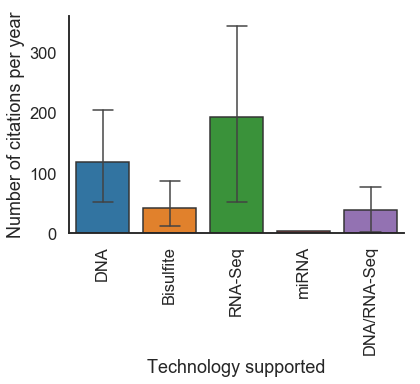

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.barplot(x="technology", y="citation_per_year", data=data,edgecolor=(0.2,0.2,0.2), 
            capsize=0.3,  errwidth=1.5)
g.set(xlabel='Technology supported', ylabel='Number of citations per year')
g=sns.despine()
plt.xticks(rotation=90)
pl.savefig('Figure_1_panels/Citation.per.domain.pdf', bbox_inches='tight')

p_value = stats.kruskal(data[(data.technology=='DNA')].index.tolist(),
                         data[(data.technology=='RNA-Seq')].index.tolist())
print p_value

# Technology by year

In [16]:
n_tools_DNA=[]
n_tools_RNA=[]
n_tools_BS=[]



for i in range(2001,2019):
    df_temp=data[(data.year == i)]
    n_tools_DNA.append(df_temp[(df_temp.technology == 'DNA')].shape[0])
    n_tools_RNA.append(df_temp[(df_temp.technology == 'RNA-Seq')].shape[0])
    n_tools_BS.append(df_temp[(df_temp.technology == 'Bisulfite')].shape[0])
    
    

from numpy import cumsum, ones


n_tools_DNA_cumsum=cumsum(n_tools_DNA)
n_tools_RNA_cumsum=cumsum(n_tools_RNA)
n_tools_BS_cumsum=cumsum(n_tools_BS)

print n_tools_DNA_cumsum
print n_tools_RNA_cumsum
print n_tools_BS_cumsum


[ 1  2  3  3  5  5  5 12 27 33 39 48 52 58 59 65 65 67]
[ 0  0  0  0  0  0  0  1  2  5  6  8 12 13 15 15 16 16]
[0 0 0 0 0 0 0 0 2 3 4 5 6 6 6 6 6 6]


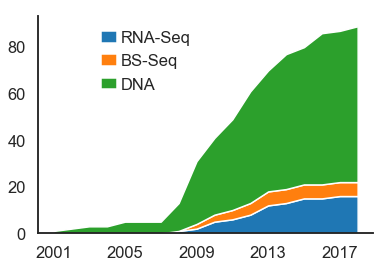

In [17]:
# library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
g=sns.set_style("white")
g=sns.set_context("talk")    
    
# Data
x=range(2001,2019)
y=[n_tools_RNA_cumsum, n_tools_BS_cumsum,n_tools_DNA_cumsum ]
 
plt.xticks(np.arange(2001, 2019, step=4))
plt.yticks(np.arange(0, 110, step=20))   

    
# Plot
plt.stackplot(x,y, labels=['RNA-Seq','BS-Seq','DNA',])
plt.legend(loc='upper left')

plt.legend(bbox_to_anchor=(0.5,1), frameon=False, ncol=1, handletextpad=0.2, columnspacing=0.8, handlelength=1)

g=sns.despine()
#plt.show(g)
plt.savefig("Figure_1_panels/Number.tools.per.domain.pdf", bbox_inches='tight')


# Index by year

In [18]:
tools_hashing=[]
tools_FM=[]
tools_suffix=[]



for i in range(2001,2019):
    df_temp=data[(data.year == i)]
    
    
    n_hash=df_temp.loc[df_temp['index'] == 'hashing'].shape[0]
    n_FM=df_temp.loc[df_temp['index'] == 'BWT-FM'].shape[0]
    n_suffix=df_temp.loc[df_temp['index'] == 'suffix array'].shape[0]
    
    tools_hashing.append(n_hash)
    tools_FM.append(n_FM)
    tools_suffix.append(n_suffix)
    
    

from numpy import cumsum, ones


tools_hashing_cumsum=cumsum(tools_hashing)
tools_FM_cumsum=cumsum(tools_FM)
tools_suffix_cumsum=cumsum(tools_suffix)

print tools_hashing_cumsum
print tools_FM_cumsum
print tools_suffix_cumsum


[ 1  2  3  3  5  5  5 11 24 31 36 43 46 49 49 55 55 58]
[ 0  0  0  0  0  0  0  1  5  8 10 14 18 21 23 23 24 25]
[0 0 0 0 0 0 0 1 2 3 4 4 5 6 6 6 6 6]


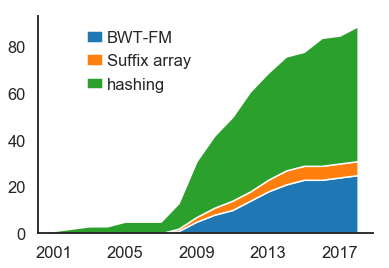

In [19]:
# library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
g=sns.set_style("white")
g=sns.set_context("talk")    
    
# Data
x=range(2001,2019)
y=[tools_FM_cumsum, tools_suffix_cumsum,tools_hashing_cumsum ]
 
plt.xticks(np.arange(2001, 2019, step=4))
plt.yticks(np.arange(0, 110, step=20))   

    
# Plot
plt.stackplot(x,y, labels=['BWT-FM','Suffix array','hashing'])
plt.legend(loc='upper left')

plt.legend(bbox_to_anchor=(0.5,1), frameon=False, ncol=1, handletextpad=0.2, columnspacing=0.8, handlelength=1)

g=sns.despine()
#plt.show(g)


plt.savefig("Figure_1_panels/Number.tools.per.index.pdf")


In [20]:
import pandas as pd
from pysankey import sankey

pd.options.display.max_rows = 8
df = pd.read_csv(
    'pysankey/fruits.txt', sep=' ', names=['true', 'predicted']
)
colorDict = {
    'apple':'#f71b1b',
    'blueberry':'#1b7ef7',
    'banana':'#f3f71b',
    'lime':'#12e23f',
    'orange':'#f78c1b'
}
sankey(
    df['true'], df['predicted'], aspect=20, colorDict=colorDict,
    fontsize=12, figureName="fruit"
)
# Result is in "fruit.png"

ImportError: No module named pysankey